

## Introduction 

The purpose of this notebook is to serve as an introduction to image processing and OpenCV. It is meant to serve as an introduction to image processing and computer vision. It is designed to help build intuition when getting started with working with image data. 

To get started, we will need: 
- OpenCV: https://opencv.org
- NumPy: https://numpy.org
- MatPlotLib: https://matplotlib.org

The reason we use Numpy is that each image is actually a three dimensional numpy array. 

In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [94]:
class ImageProcessing:

        
    def blur(self, image):
        
        kernel = np.ones((50,50),np.float32)/50**2
        blur_image = cv.filter2D(image,-1,kernel)
        
        return blur_image

    
    def black_and_white(self, image):
        
        image_bw = 0.114*image[:,:,0] + 0.587*image[:,:,1] + 0.299*image[:,:,2]
        
        return image_bw
    
    
    def blue_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,0] = image[:,:,0]
        
        return blue_image
    
    
    def green_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,1] = image[:,:,1]
        
        return blue_image
    
    
    def red_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,2] = image[:,:,2]
        
        return blue_image
    
    
    def edges(self, image):
        
        sobelx = np.abs(cv.Sobel(image,cv.CV_64F,1,0,ksize=25))
        sobely = np.abs(cv.Sobel(image,cv.CV_64F,0,1,ksize=25))
        energy = np.sqrt(sobelx**2 + sobely**2).sum(axis=2)
    
        edges_image = energy*255.0/np.max(energy)
        
        return edges_image
    
        
    def sketch():
        
        return
    
    def oilpaint(self,image):
        #https://stackoverflow.com/questions/60016168/how-to-implement-a-photoshop-like-effect-oilpaint-effect-in-opencv
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25,25))
        morph = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

        # brighten dark regions
        oilpaint = cv.normalize(morph,None,20,255,cv.NORM_MINMAX)
        
        return oilpaint
    
    


## Importing and Plotting Images

We can read in a photo using the imread function in OpenCV. To demonstrate the following image processing techniques, I will be using this photo I took in Bosnia and Herzegovina. 

In order to visualize the image, we use MatPlotLib, and plot the image data onto something the computer can visualize. MatPlotLib expects a RGB format, but CV provdes a BGR input, therefore we need to convert it before we plot the image. 

In [66]:
image = cv.imread("bosnia.jpg")

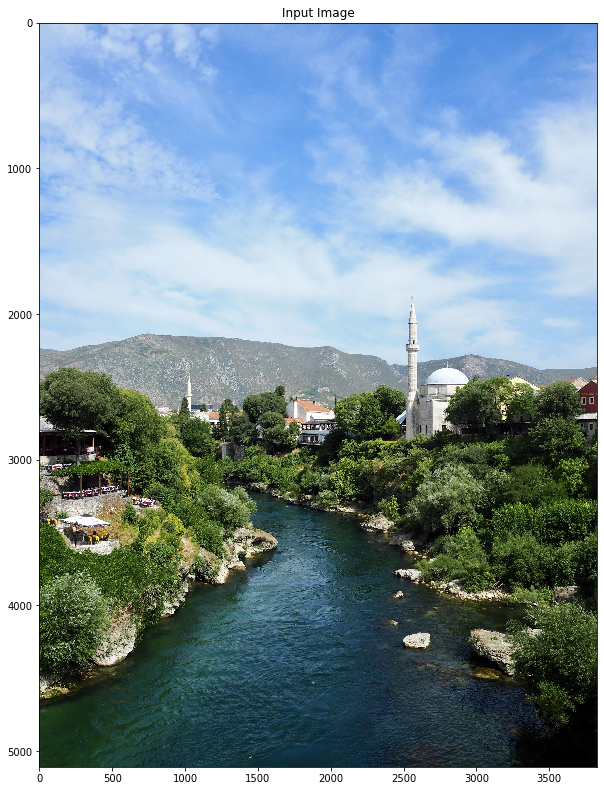

In [67]:
RGB_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize = (10,15))
plt.imshow(RGB_image)
plt.title('Input Image')
plt.show()

## Images as NumPy Arrays

You may be wondering why we are using NumPy in image processing, it is actually because an image is a three dimensional array. 

All images are numpy images with the following dimensions

(w, h, d)

because we use colored images, we will always have three channels: R, B, G.

In [68]:
image.shape

(5109, 3831, 3)

## Image Processing

For the following Image Processing demonstrations, I will be using functions built in the Image Processing Class.


In [96]:
processimage = ImageProcessing()

## Blurring an Image

Blurring an image is a simple process. We can simply use 
You can also try building this from scratch, by looping through each array, and taking the average of a certain area's pixel values. 

You might be wondering what the purpose of blurring an image may be, actually this is incredibly important in many parts of Computer Vision.

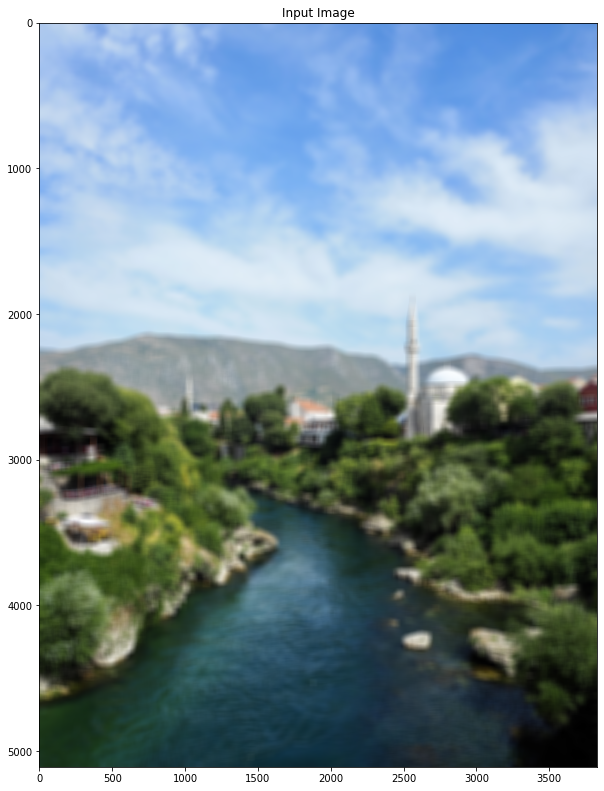

In [82]:
blur = processimage.blur(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

## Black and White

As mentioned previously, in each image we have three channels. A black and white image is simply a one channel image. In a sense we can "flatten" a colored image by combining all three channels into one. 

Each pixel is on a 0 to 255 scale. 0 being this color and 255 being this other color. 

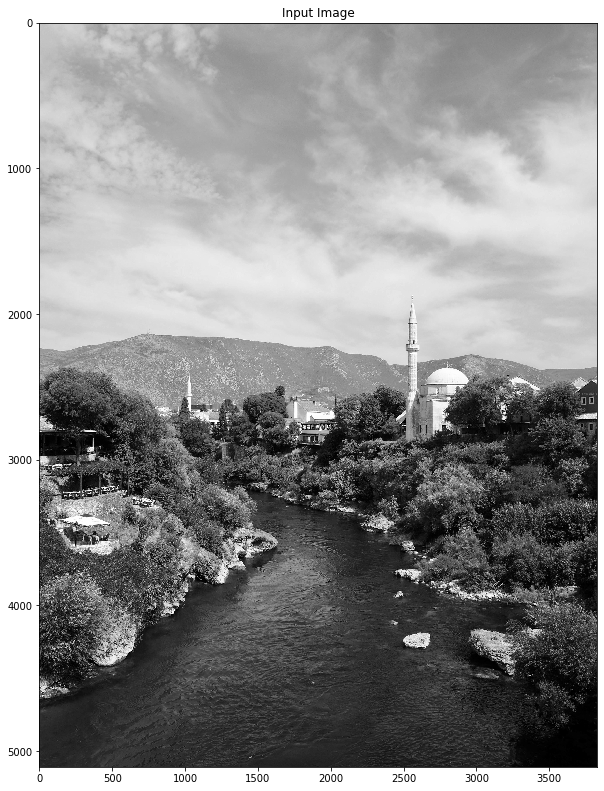

In [84]:
bw = processimage.black_and_white(image)
plt.figure(figsize = (10,15))
plt.imshow(bw, cmap="gray")
plt.title('Input Image')
plt.show()

## Isolating Color Channels

We can also change the color of an image by isolating the color channels. 

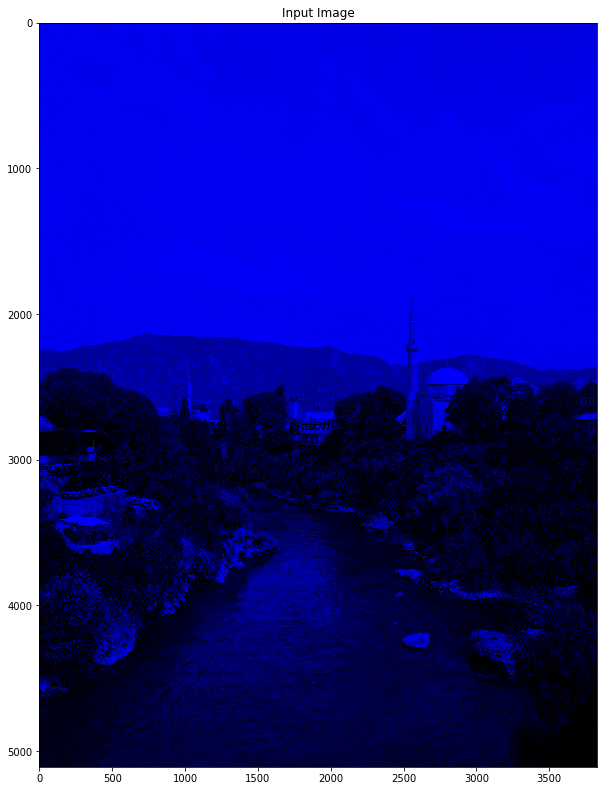

In [103]:
blue = processimage.blue_image(image)
cv.imwrite("blue.png",blue)
blue_image = cv.imread("blue.png")
RGB_image = cv.cvtColor(blue_image, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

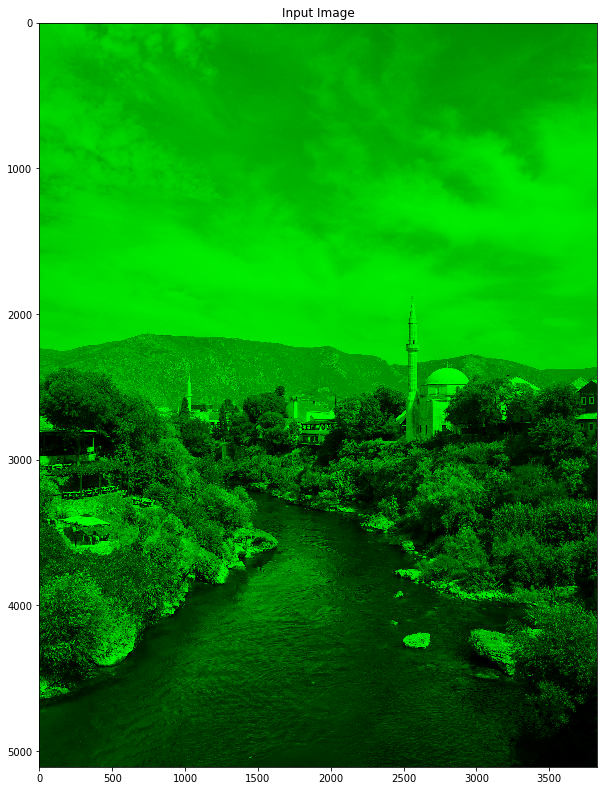

In [105]:
green = processimage.green_image(image)
cv.imwrite("green.png",green)
green_image = cv.imread("green.png")
RGB_image = cv.cvtColor(green_image, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

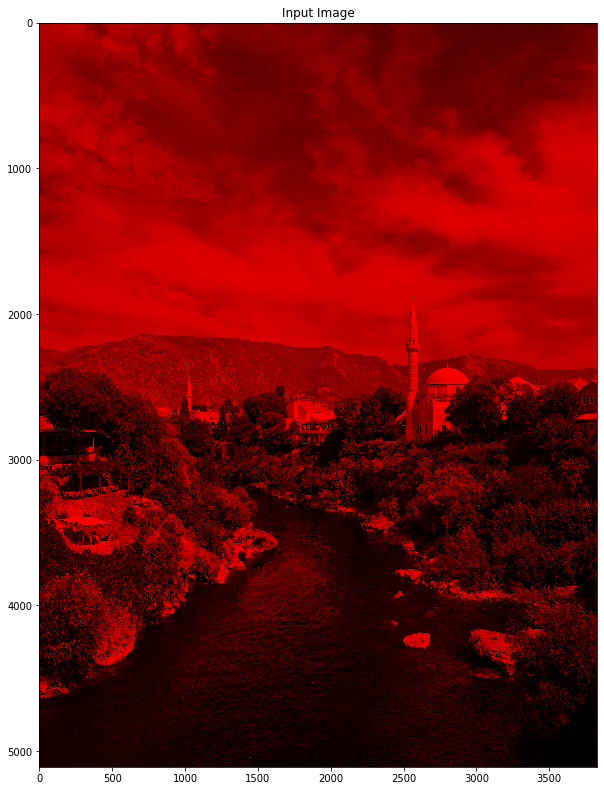

In [106]:
red = processimage.red_image(image)
cv.imwrite("red.png",red)
red_image = cv.imread("red.png")
RGB_image = cv.cvtColor(red_image, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

## Edges of an image


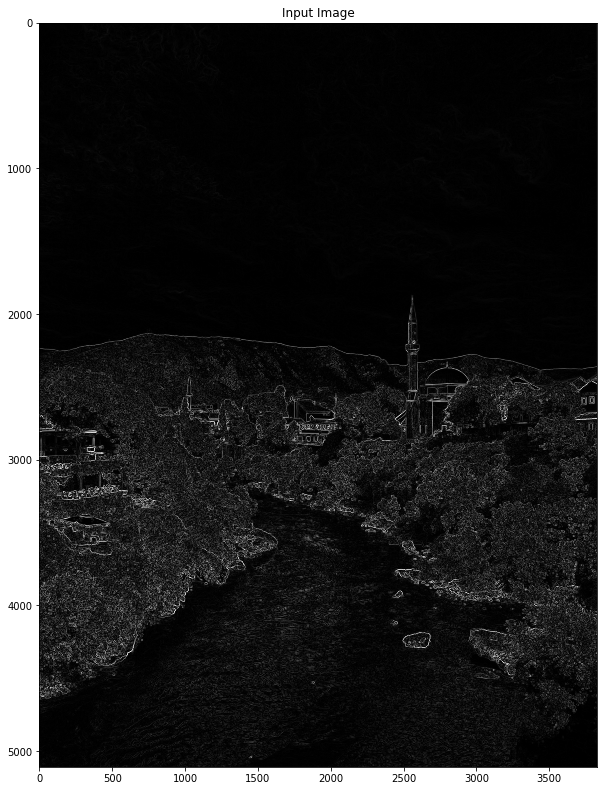

In [87]:
edges = processimage.edges(image)
plt.figure(figsize = (10,15))
plt.imshow(edges, cmap="gray")
plt.title('Input Image')
plt.show()

## Sketch Effect

Using some of the techniques previously introduced we can create a sketch like effect on an image. 

## Oil Painting 

Finally, we can also give an image an oil painting effect. 

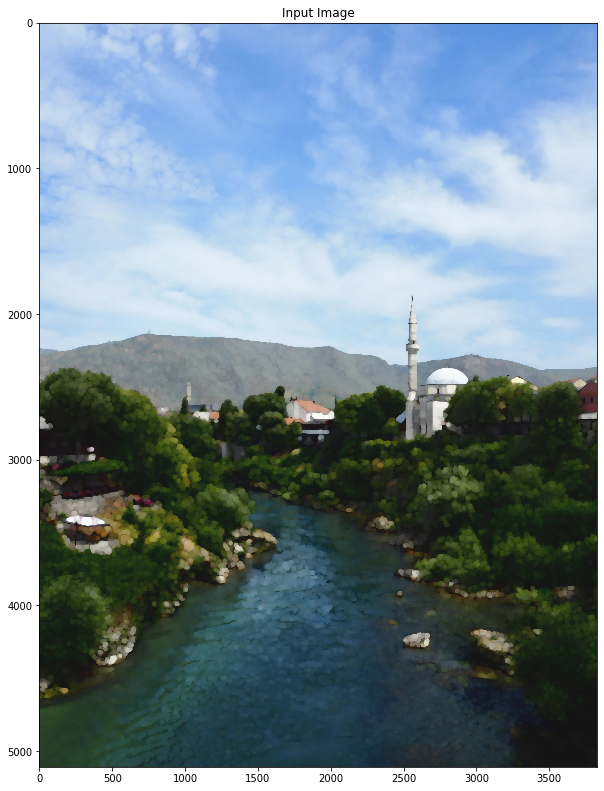

In [91]:
blur = processimage.oilpaint(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()